In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/cab_trip/train.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df.describe()[['passenger_count','trip_duration']]

,passenger_count,trip_duration
count,1.458644e+06,1.458644e+06
mean,1.664530e+00,9.594923e+02
std,1.314242e+00,5.237432e+03
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.970000e+02
50%,1.000000e+00,6.620000e+02
75%,2.000000e+00,1.075000e+03
max,9.000000e+00,3.526282e+06


# EDA : 

# Q : What is the distribution of trip duration ?

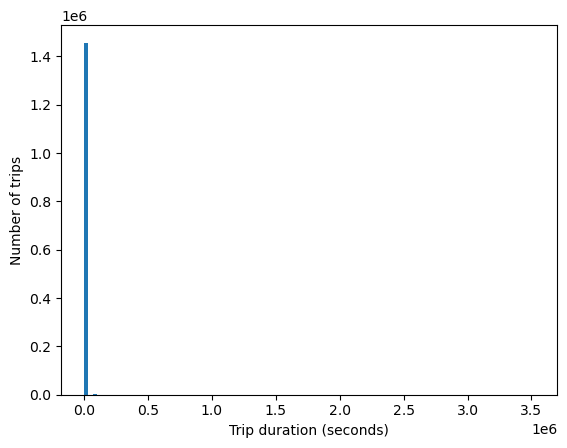

In [7]:
plt.hist(df["trip_duration"], bins=100)
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Number of trips")
plt.show()

## The data was skewed, lets dig into it.

In [8]:
# first lets convert the seconds to minutes.
df['trip_duration'] = df['trip_duration']/60

<AxesSubplot:ylabel='Frequency'>

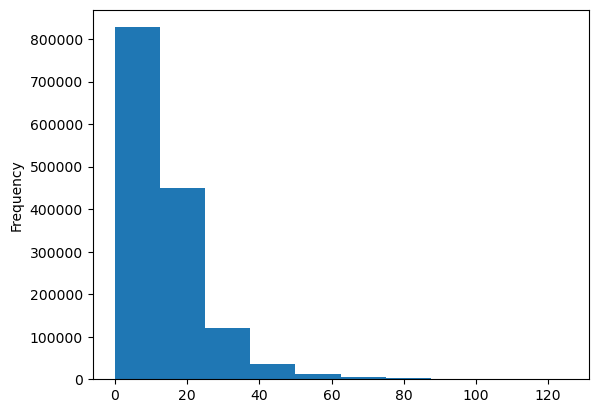

In [18]:
# had to reduce the minutes down to this, as there were a lot of trips 
made in 
df[df['trip_duration']<125]['trip_duration'].plot(kind='hist')

In [10]:
df[['trip_duration']].describe()

,trip_duration
count,1.458644e+06
mean,1.599154e+01
std,8.729053e+01
min,1.666667e-02
25%,6.616667e+00
50%,1.103333e+01
75%,1.791667e+01
max,5.877137e+04


/Users/alenjose/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

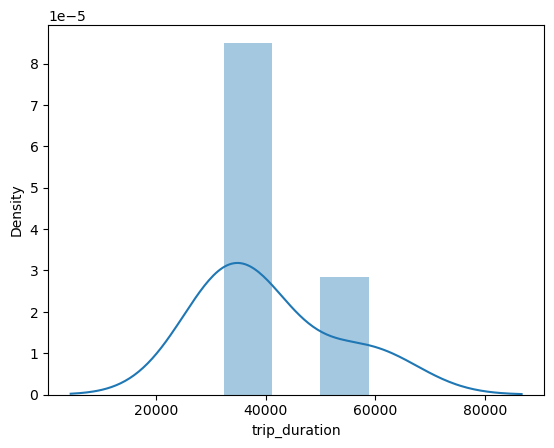

In [11]:
sns.distplot(df[df['trip_duration']>7000]['trip_duration'], kde=True, hist=True, rug=False)



/Users/alenjose/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

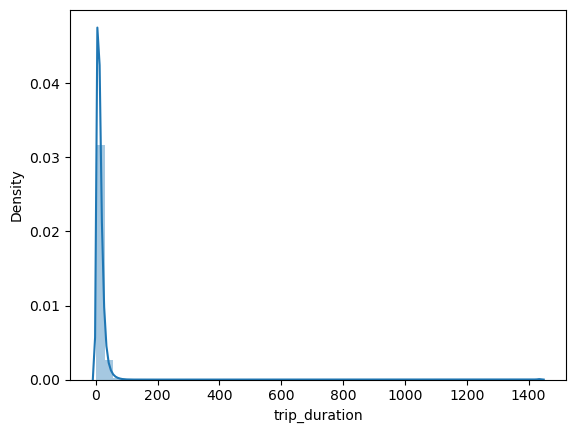

In [12]:
sns.distplot(df[df['trip_duration']<7000]['trip_duration'], kde=True, hist=True, rug=False)
